<a href="https://colab.research.google.com/github/MathBorgess/discrete-to-binary-regression/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
titanic_dataset = pd.read_csv('Titanic-Dataset.csv').drop(columns=['PassengerId','Ticket', 'Cabin'])
titanic_dataset = titanic_dataset[titanic_dataset['Embarked'].notna()]
#Trying to give some meaning to the correlations between data and the dependent variable
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [76]:
titanic_dataset.loc[titanic_dataset['Age'].isna() & titanic_dataset['Name'].str.contains('Master'), 'Age'] = 5
titanic_dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Sex    Pclass                  
female 1       34.240964     83
       2       28.722973     74
       3       21.750000    102
male   1       41.281386    101
       2       30.740707     99
       3       26.172840    257

In [77]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
titanic_dataset['Title'] = titanic_dataset['Name'].apply(get_title)
titanic_dataset.groupby(['Sex', 'Pclass','Title'])['Age'].agg(['mean', 'count'])

mean  count
Sex    Pclass Title                     
female 1      Countess  33.000000      1
              Dr        49.000000      1
              Lady      48.000000      1
              Miss      29.818182     44
              Mlle      24.000000      2
              Mme       24.000000      1
              Mrs       40.242424     33
       2      Miss      22.390625     32
              Mrs       33.682927     41
              Ms        28.000000      1
       3      Miss      16.123188     69
              Mrs       33.515152     33
male   1      Capt      70.000000      1
              Col       58.000000      2
              Don       40.000000      1
              Dr        42.000000      3
              Jonkheer  38.000000      1
              Major     48.500000      2
              Master     5.306667      3
              Mr        41.580460     87
              Sir       49.000000      1
       2      Dr        38.500000      2
              Master     2.258889      9
              Mr        32.768293     82
              Rev       43.166667      6
       3      Master     5.300714     28
              Mr        28.724891    229

In [78]:
titanic_dataset['Title'] = titanic_dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_dataset['Title'] = titanic_dataset['Title'].replace(['Mile', 'Mme', 'Mlle', 'Ms'], 'Miss')

titanic_dataset.groupby(['Sex', 'Pclass','Title'])['Age'].agg(['mean', 'count'])

mean  count
Sex    Pclass Title                   
female 1      Miss    29.446809     47
              Mrs     40.242424     33
              Rare    43.333333      3
       2      Miss    22.560606     33
              Mrs     33.682927     41
       3      Miss    16.123188     69
              Mrs     33.515152     33
male   1      Master   5.306667      3
              Mr      41.580460     87
              Rare    48.727273     11
       2      Master   2.258889      9
              Mr      32.768293     82
              Rare    42.000000      8
       3      Master   5.300714     28
              Mr      28.724891    229

In [79]:
titanic_dataset['Age'] = titanic_dataset.groupby(['Sex', 'Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.mean()))

titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1
titanic_dataset['IsAlone'] = titanic_dataset['FamilySize'] == 1

titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,True


In [80]:
titanic_dataset['Sex'] = titanic_dataset['Sex'].map({'female': 0, 'male': 1})
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
titanic_dataset['Title'] = titanic_dataset['Title'].map(title_mapping)
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].map(embarked_mapping)
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,1,2,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,3,2,False
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,4,1,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,3,2,False
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1,1,True


In [81]:
titanic_dataset.loc[titanic_dataset['Fare'] <=8,'Fare'] = 0
titanic_dataset.loc[(titanic_dataset['Fare'] >8) & (titanic_dataset['Fare'] <=14) ,'Fare'] = 1
titanic_dataset.loc[(titanic_dataset['Fare'] >14) & (titanic_dataset['Fare'] <=31) ,'Fare'] = 2
titanic_dataset.loc[(titanic_dataset['Fare'] >31) ,'Fare'] = 3

titanic_dataset['Fare'] = titanic_dataset['Fare'].astype(int)

In [82]:
titanic_dataset.loc[titanic_dataset['Age'] <=21,'Age'] = 0
titanic_dataset.loc[(titanic_dataset['Age'] >21) & (titanic_dataset['Age'] <=29) ,'Age'] = 1
titanic_dataset.loc[(titanic_dataset['Age'] >29) & (titanic_dataset['Age'] <=36) ,'Age'] = 2
titanic_dataset.loc[(titanic_dataset['Age'] >36) ,'Age'] = 3

titanic_dataset['Age'] = titanic_dataset['Age'].astype(int)

In [83]:
titanic_dataset = titanic_dataset.drop(columns=['Name','SibSp','Parch'])

<Axes: title={'center': 'Pearson Correlation of Features'}>

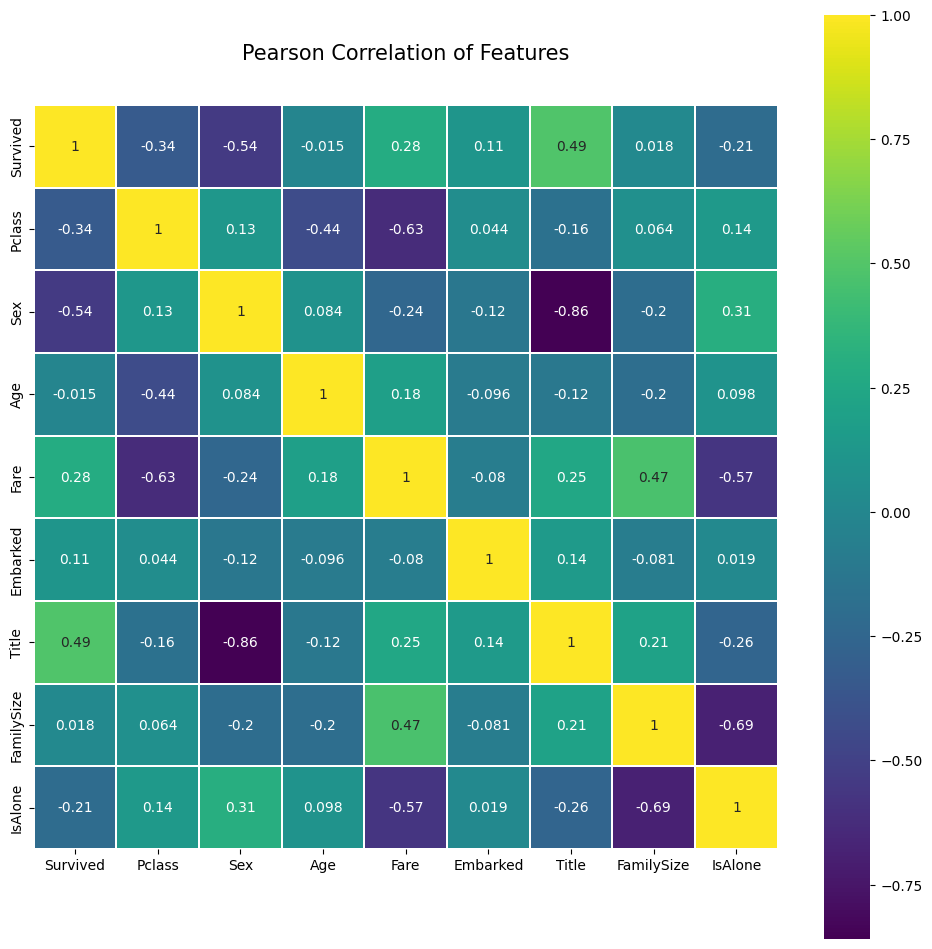

In [86]:
# Our dataset is now much cleaner than before, with only numerical values and potentially meaningful features.
titanic_dataset.corr()
#Let's see it beatifully
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [99]:
#Let's use machine learning!
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

cross_validation = KFold(n_splits=10)
accuracies = list()
attributes = len(list(titanic_dataset))
depth_range = range(1,attributes+1)

for depth in depth_range:
    fold_accuracy = []
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    for train_fold, valid_fold in cross_validation.split(titanic_dataset):
        decision_tree.fit(titanic_dataset.iloc[train_fold].drop(columns=['Survived']), titanic_dataset.iloc[train_fold]['Survived'])
        predictions = decision_tree.predict(titanic_dataset.iloc[valid_fold].drop(columns=['Survived']))

        fold_accuracy.append(accuracy_score(titanic_dataset.iloc[valid_fold]['Survived'], predictions))
    
    accuracies.append(np.mean(fold_accuracy))
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
df

,Max Depth,Average Accuracy
0,1,0.781742
1,2,0.798647
2,3,0.820046
3,4,0.831282
4,5,0.829035
5,6,0.823417
6,7,0.814428
7,8,0.807661
8,9,0.798672


In [100]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_dataset.drop(columns=['Survived']), titanic_dataset['Survived'], test_size = 0.3)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X= X_train, y= y_train)

export_graphviz(model, out_file="titanic-alive.dot", feature_names=list(X_train), class_names=['Died', 'Survived'], label="all", rounded=False, impurity = True, filled=True)
accuracy_score(y_test, model.predict(X_test))



0.8277153558052435